In [118]:
#晶格常数
a = 10.851
#总面积
Sarea = 10.851*10.851
#切片厚度
slice_thickness = 0.02

center_atom = 0
dr = 0.01
max_radius = 1.0

In [92]:
def vertical_coordinate_difference(atom1, atom2):
    """计算两个三维原子的纵坐标差的绝对值"""
    delta_z = abs(atom1[2] - atom2[2])
    return delta_z

# 示例用法
atom1 = [1.0, 2.0, 3.0]
atom2 = [1.0, 5.0, 1.0]

difference = vertical_coordinate_difference(atom1, atom2)
print("两个原子的纵坐标差的绝对值：", difference)

两个原子的纵坐标差的绝对值： 2.0


In [4]:
#解析XDATCAR

def read_xdatcar(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # 提取晶格矢量
    lattice_vectors = [list(map(float, line.split())) for line in lines[2:5]]

    # 提取元素符号和原子数目
    elements = lines[5].split()
    num_atoms = list(map(int, lines[6].split()))

    # 提取原子坐标和总帧数
    atomic_coordinates = []
    start_line = 8  # XDATCAR 文件中原子坐标开始的行数
    frames = 0
    while start_line < len(lines):
        frames += 1
        coordinates = [list(map(float, line.split())) for line in lines[start_line:start_line + sum(num_atoms)]]
        atomic_coordinates.append(coordinates)
        start_line += sum(num_atoms) + 1  # 跳过下一帧的开头行

    return lattice_vectors, elements, num_atoms, atomic_coordinates, frames

# 示例用法
xdatcar_file_path = './XDATCAR'
lattice_vectors, elements, num_atoms, atomic_coordinates, total_frames = read_xdatcar(xdatcar_file_path)

# 打印示例结果
print("晶格矢量：", lattice_vectors)
print("元素符号：", elements)
print("每个元素的原子数目：", num_atoms)
print("总帧数：", total_frames)
# print("每一帧的原子坐标：", atomic_coordinates)


晶格矢量： [[10.851, 0.0, 0.0], [0.0, 10.851, 0.0], [0.0, 0.0, 55.0]]
元素符号： ['Co', 'Al']
每个元素的原子数目： [108, 164]
总帧数： 2500


In [89]:
#只保留atomic_coordinates中每个原子的前两个坐标，并且如果坐标是负数则加1，如果大于1则减1
def process_coordinates(atomic_coordinates):
    processed_coordinates = []

    for frame in atomic_coordinates:
        processed_frame = [[(coord + 1) if coord < 0 else (coord - 1) if coord > 1 else coord for coord in atom[:2]] + [atom[2]] for atom in frame]
        processed_coordinates.append(processed_frame)

    return processed_coordinates

# 示例用法
processed_atomic_coordinates = process_coordinates(atomic_coordinates)

# 打印示例结果
print("原始原子坐标：", atomic_coordinates[0])
print("处理后的原子坐标：", processed_atomic_coordinates[0])


原始原子坐标： [[0.28828535, 0.06172921, 0.18455543], [0.46489027, 0.24019992, 0.17986966], [0.28316973, 0.24481807, 0.03004047], [0.44302299, 0.06618649, 0.0291034], [0.62347394, 0.06817465, 0.17534338], [0.77544941, 0.24697736, 0.17781186], [0.60926257, 0.25339405, 0.02786729], [0.8006257, 0.02427946, 0.02389002], [0.92754022, 0.07717126, 0.18035116], [1.08187667, 0.24741027, 0.18226807], [0.95401474, 0.22816298, 0.03133566], [1.12705188, 0.08143649, 0.03422983], [0.28978514, 0.39674504, 0.17715212], [0.44484708, 0.57354952, 0.1778958], [0.26809111, 0.53686016, 0.0260045], [0.42730917, 0.39522445, 0.02743071], [0.61381001, 0.43798468, 0.1784019], [0.77898034, 0.57787417, 0.17593056], [0.59279778, 0.5555096, 0.0292745], [0.78583247, 0.3896749, 0.02935402], [0.93007055, 0.40324142, 0.17636117], [1.12786928, 0.54895447, 0.1780492], [0.95040615, 0.58038428, 0.03103862], [1.09419421, 0.41434418, 0.02430466], [0.301397, 0.74548823, 0.18667915], [0.46436588, 0.90619445, 0.17604756], [0.29705331, 0

In [52]:
a = np.random.rand(100)
random_numbers = np.random.uniform(0, 100, 100)

hist,bins = np.histogram(random_numbers,bins=np.arange(0,100))
print(random_numbers)
print(hist)


[81.57773797  6.14387638 83.88256503 77.71523562 31.73150819  3.64103005
 31.18597759  4.66186135 80.4728657  92.92447249 46.53833038 94.62399511
  3.08186576 13.8298497  50.77596055 40.66036762 66.78796534 47.93403911
 23.99051869  8.75240902 80.99504086 43.93718722 20.42173839 58.65597848
 74.21305904 23.75195425  6.28423431 18.55513034  6.77366515 67.61117302
 34.40772868 38.07089489 54.70312324 80.41246799 69.44713377 73.49217833
 72.6729546  57.5006059  72.12610197 89.94736366 95.51128682 63.99708049
 81.17230455  5.79317015 30.93044567 47.0015693  29.15764767 10.10103612
 23.07423404 57.70783903 79.12739898 34.01651724 25.14258565 94.81247758
 64.8607332  28.04633344 66.66083859 75.49854251 11.32342248 82.27940651
 36.60724725 76.36771428 66.061912   37.66014091 51.08052358 91.27687549
 10.21746758  9.71358546 21.9447916  48.32756735 72.30115732 81.03146173
 75.86596768 28.50938859 96.36351148 18.30927449 10.79898574 22.92235218
 44.66255374 68.91259338 58.39579726 54.95676033 57

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def distance(p1, p2):
    """计算两点之间的距离"""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def radial_distribution_function(coordinates, center_atom, dr, max_radius):
    #avg_density = N总/S总
    avg_density = len(coordinates)/Sarea
    """计算二维坐标系中的径向分布函数"""
    center = coordinates[center_atom]  # 指定原子的坐标
    distances = []

    for i, atom in enumerate(coordinates):
        #中心点纵坐标，超出切片范围则跳过
        if vertical_coordinate_difference(center, atom) > slice_thickness:
            continue
        
        if i != center_atom:
            dist = distance(center, atom)
            distances.append(dist)

    bins = np.arange(0, max_radius + dr, dr)
    #落在圆环上的点的个数
    rdf_num, _ = np.histogram(distances, bins=bins)
    # print("每一圈的原子个数：" )
    # print(rdf_num)
    #每个圆环的面积
    #print(bins[1:])
    areas = 2 * np.pi * bins[1:] * dr*a
    # print("每一圈的面积：" )
    # print(areas)
    #print(areas)
    # 计算每个圆环上点的个数与面积之比
    rdf_ratio = rdf_num / areas
    #比平均密度
    rdf_dr = rdf_ratio/avg_density
    return bins, rdf_dr

# 示例用法
# 假设 processed_atomic_coordinates 是一个包含所有原子坐标的数组
# center_atom 是指定原子的索引
# dr 是半径步长，max_radius 是最大半径


bins, rdf_dr = radial_distribution_function(processed_atomic_coordinates[5], center_atom, dr, max_radius)
print(rdf_dr)



[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         2.44201115 0.         2.26758179 0.         0.
 0.         0.         0.         3.73484059 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.24494686 1.22100558 1.19796774 1.17578315
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.97680446 0.
 0.         0.         0.92017812 0.         0.         0.88183736
 0.8697574  0.         0.         0.83542487 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.73828244 0.72979644 0.         0.         0.
 0.         0.         0.         0.         0.         0.66137802
 0.65455969 0.         0.       

In [57]:
avg_density = len(processed_atomic_coordinates[2])/Sarea
rdf_ratio[0]/avg_density

2.3100925369564482

In [108]:
#一帧中所有原子为中心的rdf的平均
def calculate_all_rdfs(processed_atomic_coordinate):
    all_rdfs = []
    #以一帧的每一个原子为中心
    for center_atom in range(len(processed_atomic_coordinate)):
        bins, rdf_dr = radial_distribution_function(
            processed_atomic_coordinate,
            center_atom,
            dr,
            max_radius,
        )
        all_rdfs.append(rdf_dr)

    return np.mean(all_rdfs, axis=0)
calculate_all_rdfs(processed_atomic_coordinates[0])


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02334275,
       0.08892478, 0.55173781, 0.95400819, 0.87535326, 0.97105855,
       0.86188629, 0.65705529, 0.3668147 , 0.22537831, 0.42016957,
       0.40661571, 0.45226585, 0.55173781, 0.4805861 , 0.49353251,
       0.27233213, 0.17664787, 0.23342754, 0.13167707, 0.08169964,
       0.10248038, 0.15561836, 0.16285642, 0.23342754, 0.18674203,
       0.28417265, 0.28805951, 0.31123672, 0.35252322, 0.35480986,
       0.31123672, 0.44889911, 0.48447225, 0.52737332, 0.33953096,
       0.14172386, 0.17199924, 0.18513218, 0.11077917, 0.09337101,
       0.09184034, 0.06023936, 0.08892478, 0.14589221, 0.1508301 ,
       0.16269192, 0.22297556, 0.19909996, 0.1759164 , 0.14005652,
       0.13808389, 0.20100705, 0.21104407, 0.23973639, 0.23653

In [109]:
#所有帧中所有原子为中心的rdf的平均
all_rdfs = []
for processed_atomic_coordinate in processed_atomic_coordinates:
        rdf_dr = calculate_all_rdfs(processed_atomic_coordinate)
        all_rdfs.append(rdf_dr)

rdf_all = np.mean(all_rdfs, axis=0)
rdf_all

In [110]:
rdf_all

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.78786021e-04, 3.11236716e-03, 6.95859773e-03, 2.23530209e-02,
       1.18243274e-01, 4.30550725e-01, 8.26901825e-01, 1.08068390e+00,
       1.03464048e+00, 8.17384227e-01, 6.05901805e-01, 4.32467863e-01,
       3.26965975e-01, 2.89624438e-01, 3.32485147e-01, 4.34513688e-01,
       5.50628680e-01, 5.77444802e-01, 4.82728146e-01, 3.11324899e-01,
       1.98279659e-01, 1.42061542e-01, 1.16062565e-01, 1.06937823e-01,
       1.07991549e-01, 1.13214578e-01, 1.18637646e-01, 1.40884129e-01,
       1.94767787e-01, 2.82195624e-01, 3.54980705e-01, 3.79097991e-01,
       3.52424131e-01, 3.31067474e-01, 3.77892635e-01, 4.59514675e-01,
       5.13769604e-01, 4.61048780e-01, 3.32424579e-01, 2.13269402e-01,
      

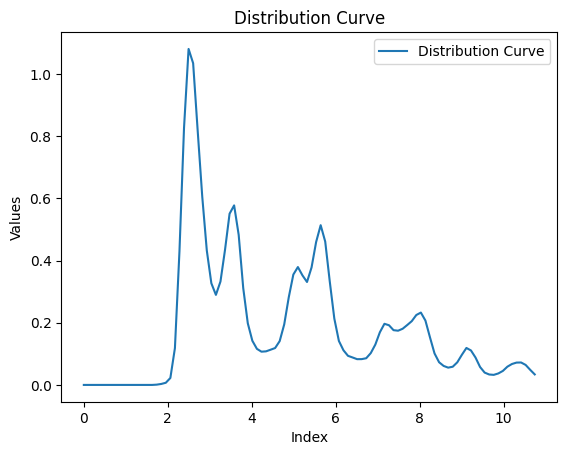

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# 提供的数据

# 生成与数据长度相同的 x 坐标
#x = np.arange(len(rdf_all))
x = np.arange(0, len(rdf_all) * dr * a , dr*a)

# 绘制分布曲线
plt.plot(x, rdf_all, label="Distribution Curve")

# 添加标签和标题
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Distribution Curve")

# 显示图例
plt.legend()

# 显示图形
plt.show()